In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
import nltk

In [2]:
books = pd.read_csv('datasets/Books.csv')
ratings = pd.read_csv('datasets/Ratings.csv')
users = pd.read_csv('datasets/Users.csv')
display(books.head())
display(ratings.head())
display(users.head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\4228171812.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('datasets/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
display(books.shape)
display(users.shape)
display(ratings.shape)

(271360, 8)

(278858, 3)

(1149780, 3)

we have more ratings than number of books

In [4]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [5]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [6]:
books.iloc[118033]['Book-Title']

'A+ Quiz Masters:01 Earth'

In [7]:
books.iloc[187689]['Book-Title']

'The Credit Suisse Guide to Managing Your Personal Wealth'

In [8]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
books.iloc[118033]['Book-Author'] = 'Unknown'
books.iloc[187689]['Book-Author'] = 'Downes, Larissa Anne'

C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3499476486.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  books.iloc[118033]['Book-Author'] = 'Unknown'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3499476486.py:2: FutureWarning: Ch

In [10]:
books.iloc[187689]['Book-Author']

'Downes, Larissa Anne'

In [11]:
books.iloc[118033]['Book-Author']

'Unknown'

In [12]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

As we can see, there are lots of missing values in age. So we should drop Age column

In [14]:
users.drop(columns=['Age'], inplace=True)

In [15]:
users.isna().sum()

User-ID     0
Location    0
dtype: int64

In [16]:
display(users.shape)

(278858, 2)

In [17]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Users's Data set is perfect. So we dont need to fix anything

# Checking Duplicated Values

In [18]:
books.duplicated().sum()

0

In [19]:
users.duplicated().sum()

0

In [20]:
ratings.duplicated().sum()

0

There are no duplicate values in the datasets.

## EDA

In [21]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [23]:
books[books['Year-Of-Publication'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [24]:
books.iloc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [25]:
books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
books.iloc[209538][
    'Book-Title'] = 'DK Readers: The Story of the X-Men, How It All Began (Level 4: Proficient Readers)'
books.iloc[209538]['Year-Of-Publication'] = 2000
books.iloc[209538]['Publisher'] = 'DK Publishing Inc'

C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3021779827.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  books.iloc[209538]['Book-Author'] = 'Michael Teitelbbaum'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3021779827.py:2: Futur

In [26]:
books.iloc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: The Story of the X-Men, How It All...
Book-Author                                          Michael Teitelbbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [27]:
books.iloc[220731]

ISBN                                                          2070426769
Book-Title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
Book-Author                                                         2003
Year-Of-Publication                                            Gallimard
Publisher              http://images.amazon.com/images/P/2070426769.0...
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

In [28]:
books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
books.iloc[220731]['Book-Author'] = 'Jean-Marie Gustave Le Clézio'
books.iloc[220731]['Year-Of-Publication'] = 1990
books.iloc[220731]['Publisher'] = 'Gallimard'

C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3237675414.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  books.iloc[220731]['Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"
C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\3237

In [29]:
books.iloc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                         2000
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

In [30]:
books.iloc[221678]['Book-Title']

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

In [71]:
books.iloc[221678][
    'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.iloc[221678]['Book-Author'] = 'James Buckley'
books.iloc[221678]['Year-Of-Publication'] = 2000
books.iloc[221678]['Publisher'] = 'DK Publishing Inc'

C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\521559018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.iloc[221678][
C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\521559018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.iloc[221678]['Book-Author'] = 'James Buckley'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\521559018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.iloc[221678]['Year-Of-Public

In [32]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [33]:
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
2050        2
2038        1
2037        1
2030        7
2026        1
2024        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       46
2004     5839
2003    14358
2002    17627
2001    17359
2000    17234
1999    17431
Name: count, dtype: int64

In [34]:
books[books['Year-Of-Publication']>2021][['Book-Title','Year-Of-Publication','Publisher','Book-Author']]

,Book-Title,Year-Of-Publication,Publisher,Book-Author
37487,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,2030,Aladdin,Coville
55676,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,2030,Aladdin,Bruce Coville
78168,Crossing America,2030,National Geographic,National Geographic Society
80264,Alice's Adventures in Wonderland and Through t...,2050,Puffin Books,Lewis Carroll
97826,Outline of European Architecture (Pelican S.),2050,Penguin USA,Nikolaus Pevsner
116053,Three Plays of Eugene Oneill,2038,Vintage Books USA,Eugene O'Neill
118294,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,2026,Goldmann,Kathy Lette
192993,"Field Guide to the Birds of North America, 3rd...",2030,National Geographic,National Geographic Society
228173,FOREST PEOPLE (Touchstone Books (Hardcover)),2030,Simon &amp; Schuster,Colin M. Turnbull
240169,In Our Time: Stories (Scribner Classic),2030,Collier Books,Ernest Hemingway


In [35]:
# Viewing the full names
display(books.iloc[37487]['Book-Title'])
display(books.iloc[55676]['Book-Title'])
display(books.iloc[80264]['Book-Title'])
display(books.iloc[192993]['Book-Title'])

'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'

'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'

"Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"

'Field Guide to the Birds of North America, 3rd Ed.'

## Fixing the year again

In [36]:
books.loc[37487, 'Year-Of-Publication'] = 1991
#'MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Year-Of-Publication'] = 1991

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[55676, 'Year-Of-Publication'] = 2005

# 'MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS)'
books.loc[37487, 'Book-Author'] = 'Bruce Coville'

# "Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books)"
books.loc[80264, 'Year-Of-Publication'] = 2003

# 'Field Guide to the Birds of North America, 3rd Ed.'
books.loc[192993, 'Year-Of-Publication'] = 2003

# Crossing America
books.loc[78168, 'Year-Of-Publication'] = 2001

# Outline of European Architecture (Pelican S.)
books.loc[97826, 'Year-Of-Publication'] = 1981

# Three Plays of Eugene Oneill
books.loc[116053, 'Year-Of-Publication'] = 1995

# Setting to current date of project since no information could be found
# Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.
books.loc[118294, 'Year-Of-Publication'] = 2023

# FOREST PEOPLE (Touchstone Books (Hardcover))
books.loc[228173, 'Year-Of-Publication'] = 1987

# In Our Time: Stories (Scribner Classic)
books.loc[240169, 'Year-Of-Publication'] = 1996

# CLOUT
books.loc[246842, 'Year-Of-Publication'] = 1925

# To Have and Have Not
books.loc[255409, 'Year-Of-Publication'] = 1937

# FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS
books.loc[260974, 'Year-Of-Publication'] = 1991

In [37]:
display(
    books['Year-Of-Publication'].value_counts().sort_index().iloc[:20])
books['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]

Year-Of-Publication
0       4618
1376       1
1378       1
1806       1
1897       1
1900       3
1901       7
1902       2
1904       1
1906       1
1908       1
1909       2
1910       1
1911      19
1914       1
1917       1
1919       1
1920      33
1921       2
1922       2
Name: count, dtype: int64

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

it seems like we have a lot of books without the year data and hence set to the value 0

In [38]:
books_year_rational = books[books['Year-Of-Publication']!=0]['Year-Of-Publication'].value_counts().sort_index(ascending=False).iloc[:20]
books_year_rational

Year-Of-Publication
2023        1
2021        1
2020        3
2012        1
2011        2
2010        2
2008        1
2006        3
2005       47
2004     5839
2003    14360
2002    17627
2001    17360
2000    17234
1999    17431
1998    15766
1997    14890
1996    14031
1995    13547
1994    11796
Name: count, dtype: int64

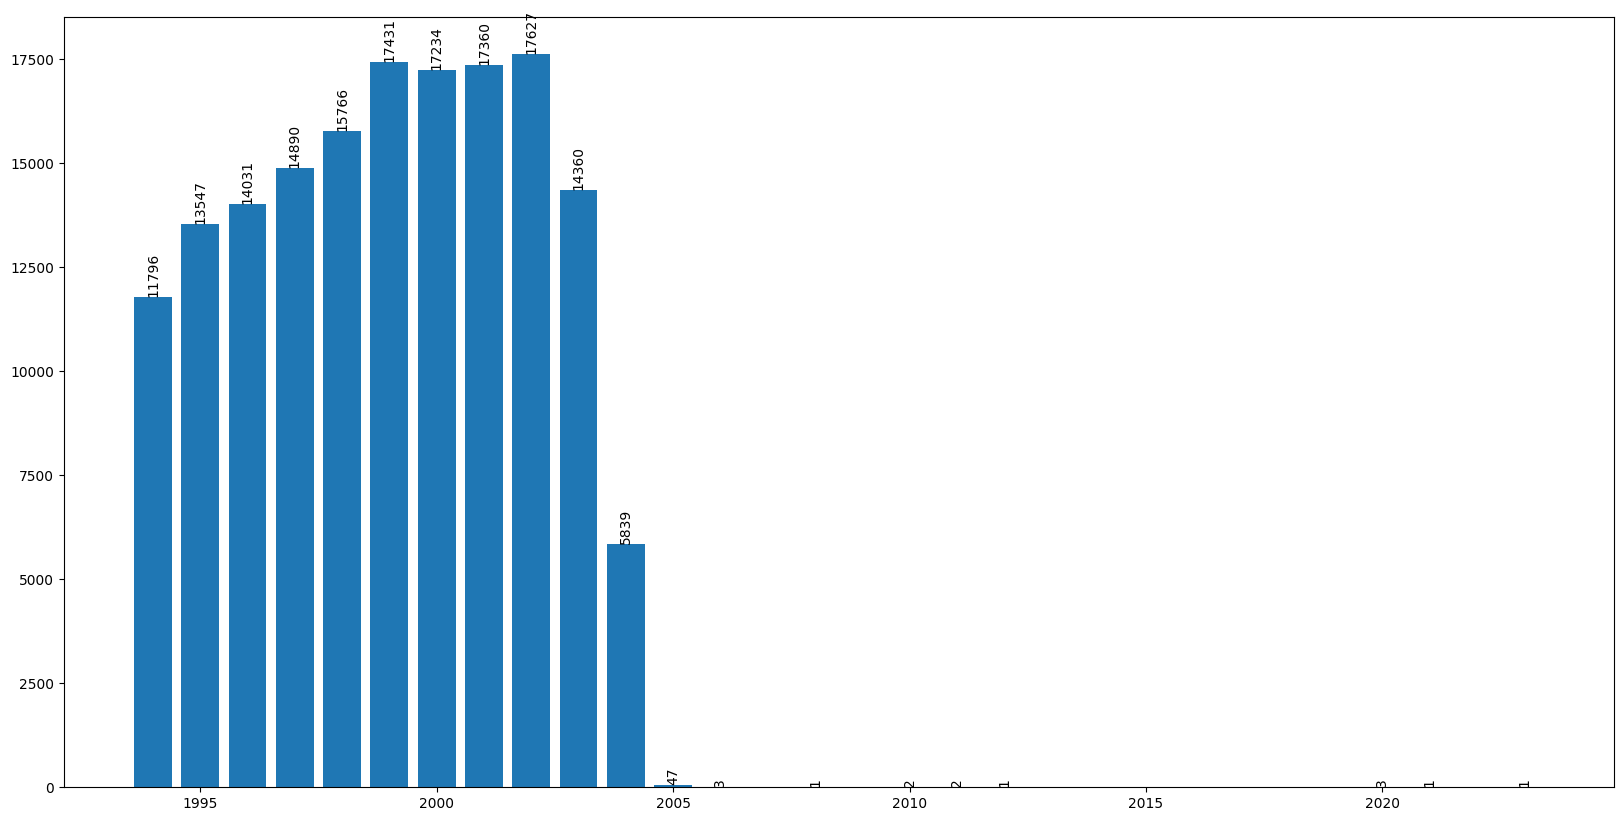

In [39]:
plt.figure(figsize=(20,10))
bars = plt.bar(x=books_year_rational.index,height=books_year_rational.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             '{:.0f}'.format(height), ha='center', va='bottom', rotation='vertical')
plt.show()

## Authors

Find out if there authors with multiple books or not

In [40]:
books[books['Book-Author'].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
62,0679865691,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...,http://images.amazon.com/images/P/0679865691.0...
67,0804106304,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...
74,0345465083,Seabiscuit,LAURA HILLENBRAND,2003,Ballantine Books,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...,http://images.amazon.com/images/P/0345465083.0...
92,8445071769,El Senor De Los Anillos: Las DOS Torres (Lord ...,J. R. R. Tolkien,2001,Minotauro,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...
93,8445071777,El Senor De Los Anillos: El Retorno Del Rey (T...,J. R. R. Tolkien,2001,Distribooks,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...
...,...,...,...,...,...,...,...,...
271353,014002803X,Anti Death League,Kingsley Amis,1975,Viking Press,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...,http://images.amazon.com/images/P/014002803X.0...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...


 Find their number of books per author

In [41]:
# Number of unique authors
len(books['Book-Author'].unique())

102022

In [42]:
author_book_count = books['Book-Author'].value_counts()
author_book_count.head(20)

Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: count, dtype: int64

# Error in author name:

there are a lot of books with no authors. So lets drop them for a while and count the rest

In [44]:
author_book_count = books[books['Book-Author']!= 'Not Applicable (Na )']
author_book_count_top50 = author_book_count.groupby('Book-Author').count()['Book-Title'].sort_values(ascending=False).head(50)
author_book_count_top50.head(20)

Book-Author
Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Roald Dahl               195
Name: Book-Title, dtype: int64

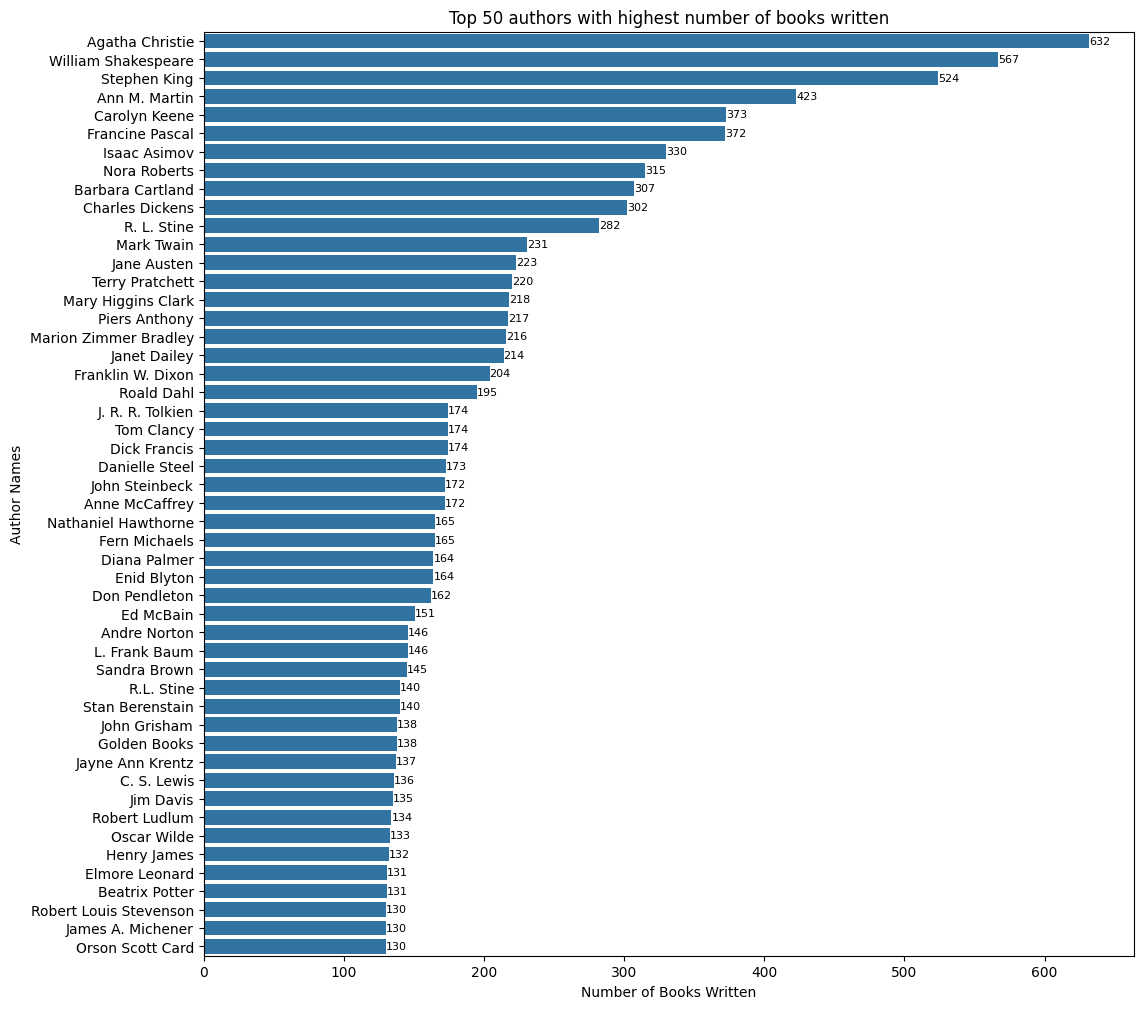

In [49]:
plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=author_book_count_top50.index,
                       x=author_book_count_top50.values, orient='h', legend=False)

for i, value in enumerate(author_book_count_top50.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)

plt.ylabel("Author Names")
plt.xlabel("Number of Books Written")
plt.title("Top 50 authors with highest number of books written")
plt.show()

In [52]:
publishers = books['Publisher'].value_counts()
publishers

Publisher
Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: count, Length: 16804, dtype: int64

In [53]:
top_50_publishers = publishers.sort_values(ascending=False)[:50]
top_50_publishers

Publisher
Harlequin                             7535
Silhouette                            4220
Pocket                                3905
Ballantine Books                      3783
Bantam Books                          3646
Scholastic                            3160
Simon &amp; Schuster                  2971
Penguin Books                         2844
Berkley Publishing Group              2771
Warner Books                          2727
Penguin USA                           2717
Harpercollins                         2525
Fawcett Books                         2258
Signet Book                           2070
Random House Inc                      2045
St Martins Pr                         1953
St. Martin's Press                    1783
Tor Books                             1704
HarperCollins Publishers              1700
Zebra Books                           1694
Bantam                                1660
Avon                                  1566
Jove Books                            1553
V

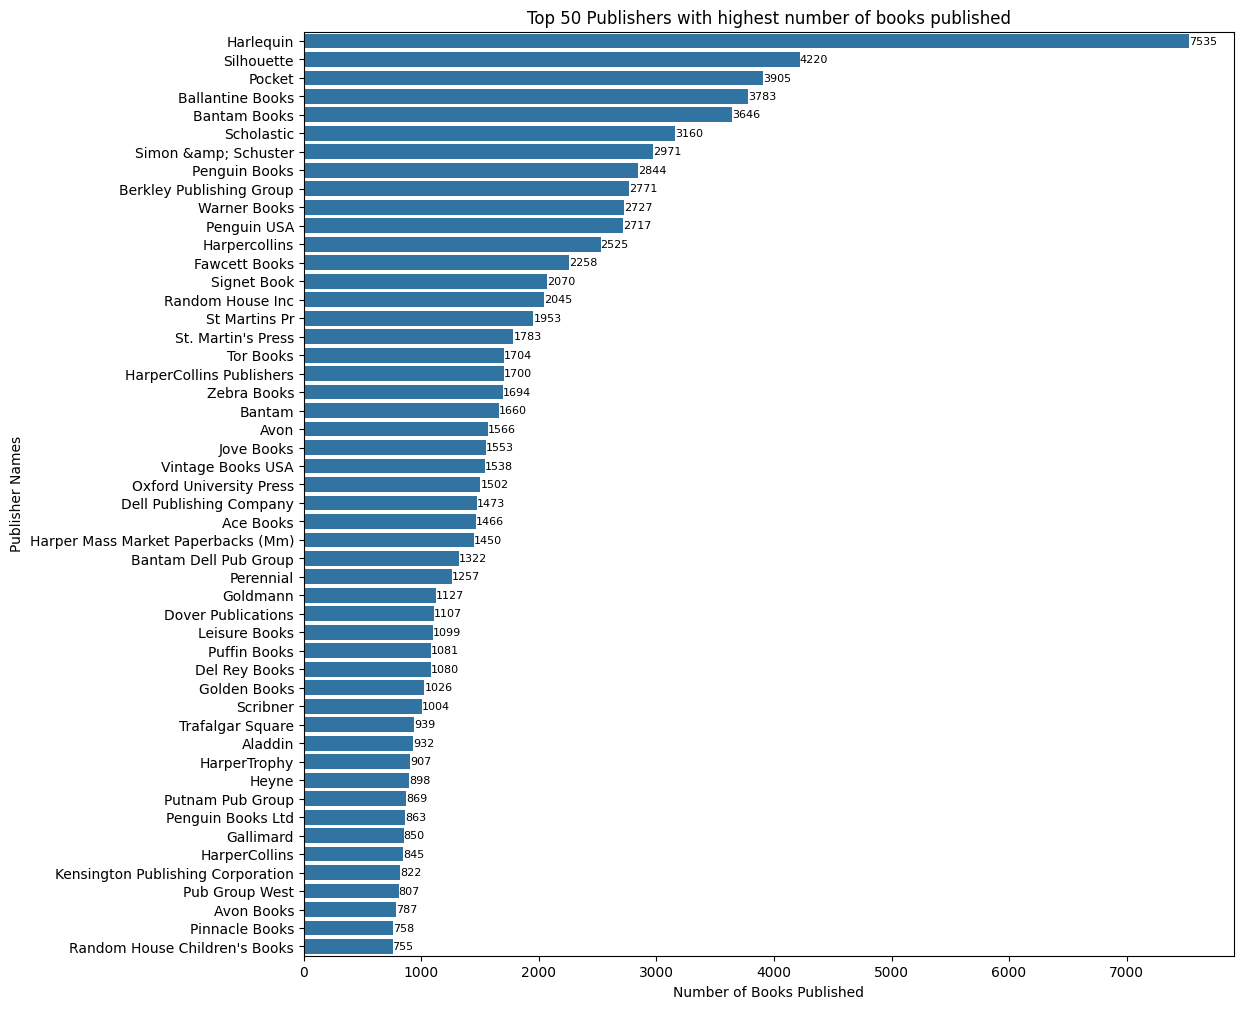

In [54]:
plt.figure(figsize=(12, 12))

sns_plot = sns.barplot(y=top_50_publishers.index,
            x=top_50_publishers.values,orient='h')

for i, value in enumerate(top_50_publishers.values):
    sns_plot.text(value, i, int(value), ha="left",
                  va="center", color='black', fontsize=8)
                  

plt.ylabel("Publisher Names")
plt.xlabel("Number of Books Published")
plt.title("Top 50 Publishers with highest number of books published")
plt.show()

## Ratings Dataset

In [55]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [56]:
display(books.shape)
display(ratings.shape)

(271360, 8)

(1149780, 3)

In [60]:
bookRating = pd.merge(ratings, books, on="ISBN")
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [61]:
bookRating.shape

(1031136, 10)

In [62]:
bookRating.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [63]:
bookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [64]:
bookRating.shape

(1031136, 7)

# Calculating the Average Rating of all Books

In [67]:
averageRating = pd.DataFrame(bookRating.groupby('ISBN')['Book-Rating'].mean().round(1))
averageRating.reset_index(inplace=True)
averageRating.head(10)

,ISBN,Book-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0
5,0001046934,0.0
6,0001047213,9.0
7,0001047647,0.0
8,0001047663,0.0
9,0001047868,0.0


In [72]:
averageRating.shape
averageRating.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
averageRating.head(10)

,ISBN,Average-Rating
0,0000913154,8.0
1,0001010565,0.0
2,0001046438,9.0
3,0001046713,0.0
4,000104687X,6.0
5,0001046934,0.0
6,0001047213,9.0
7,0001047647,0.0
8,0001047663,0.0
9,0001047868,0.0


Merge averageRating with bookRating

In [73]:
averageRatingdf = pd.merge(bookRating, averageRating, on='ISBN')
averageRatingdf.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2.9
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,2.5
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,4.1
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,3.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,6.0


In [74]:
averageRatingdf.shape

(1031136, 8)

In [75]:
averageRatingOnly = averageRatingdf[['ISBN','Average-Rating']]
averageRatingOnly.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [76]:
averageRatingUnique = averageRatingOnly[['ISBN','Average-Rating']].drop_duplicates(subset=['ISBN'])
averageRatingUnique.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [77]:
ratingBooks = pd.merge(books, averageRatingUnique, on='ISBN', how='inner')

In [78]:
display(books.shape)
averageRatingUnique.shape

(271360, 8)

(270151, 2)

In [79]:
books_with_rating = pd.merge(books, averageRatingUnique, on='ISBN')
books_with_rating.shape

(270151, 9)

In [84]:
books_with_rating = books_with_rating[['ISBN','Book-Title','Book-Author','Average-Rating','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']]
books_with_rating.head()

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,0.0,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,4.9,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,5.0,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,4.3,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0.0,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# EDA on Average Rating of Book

the top 20 books with highest average rating

In [85]:
books_with_rating.sort_values(by=['Average-Rating'], ascending=False).head(20)


,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
127129,0743227565,The Last War : Detective Ferrets and the Case ...,Richard Bach,10.0,2003,Scribner,http://images.amazon.com/images/P/0743227565.0...,http://images.amazon.com/images/P/0743227565.0...,http://images.amazon.com/images/P/0743227565.0...
125450,0345457234,"Return Engagement (Settling Accounts Trilogy, ...",Harry Turtledove,10.0,2004,Del Rey,http://images.amazon.com/images/P/0345457234.0...,http://images.amazon.com/images/P/0345457234.0...,http://images.amazon.com/images/P/0345457234.0...
125460,0505525208,Come To Me,Lisa Cach,10.0,2004,Love Spell,http://images.amazon.com/images/P/0505525208.0...,http://images.amazon.com/images/P/0505525208.0...,http://images.amazon.com/images/P/0505525208.0...
125461,0743477146,Let the Church Say Amen,ReShonda Tate Billingsley,10.0,2004,Pocket,http://images.amazon.com/images/P/0743477146.0...,http://images.amazon.com/images/P/0743477146.0...,http://images.amazon.com/images/P/0743477146.0...
125462,0446691402,Gloriana : Or the Unfulfill'd Queen,Michael Moorcock,10.0,2004,Aspect,http://images.amazon.com/images/P/0446691402.0...,http://images.amazon.com/images/P/0446691402.0...,http://images.amazon.com/images/P/0446691402.0...
125464,0399152172,"Hard, Hard City",Jim Fusilli,10.0,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399152172.0...,http://images.amazon.com/images/P/0399152172.0...,http://images.amazon.com/images/P/0399152172.0...
125467,0373750390,Coming Home To Texas : Baby To Be (American Ro...,Victoria Chancellor,10.0,2004,Harlequin,http://images.amazon.com/images/P/0373750390.0...,http://images.amazon.com/images/P/0373750390.0...,http://images.amazon.com/images/P/0373750390.0...
125468,0373750382,The Cowboy : The Lost Millionaires (American R...,Leah Vale,10.0,2004,Harlequin,http://images.amazon.com/images/P/0373750382.0...,http://images.amazon.com/images/P/0373750382.0...,http://images.amazon.com/images/P/0373750382.0...
125469,0765306883,Crucible,Nancy Kress,10.0,2004,Tor Books,http://images.amazon.com/images/P/0765306883.0...,http://images.amazon.com/images/P/0765306883.0...,http://images.amazon.com/images/P/0765306883.0...
125470,0425198049,The Painted Rose (Berkley Sensation),DONNA BIRDSELL,10.0,2004,Berkley Publishing Group,http://images.amazon.com/images/P/0425198049.0...,http://images.amazon.com/images/P/0425198049.0...,http://images.amazon.com/images/P/0425198049.0...


In [86]:
ratings_sorted = books_with_rating['Average-Rating'].value_counts().sort_index(ascending=False)
display(ratings_sorted)
books_with_rating['Average-Rating'].value_counts(normalize=True).round(4).sort_index(ascending=False)

Average-Rating
10.0     13112
9.8         14
9.7         48
9.6          2
9.5        489
         ...  
0.4        124
0.3        102
0.2         49
0.1         12
0.0     120315
Name: count, Length: 100, dtype: int64

Average-Rating
10.0    0.0485
9.8     0.0001
9.7     0.0002
9.6     0.0000
9.5     0.0018
         ...  
0.4     0.0005
0.3     0.0004
0.2     0.0002
0.1     0.0000
0.0     0.4454
Name: proportion, Length: 100, dtype: float64

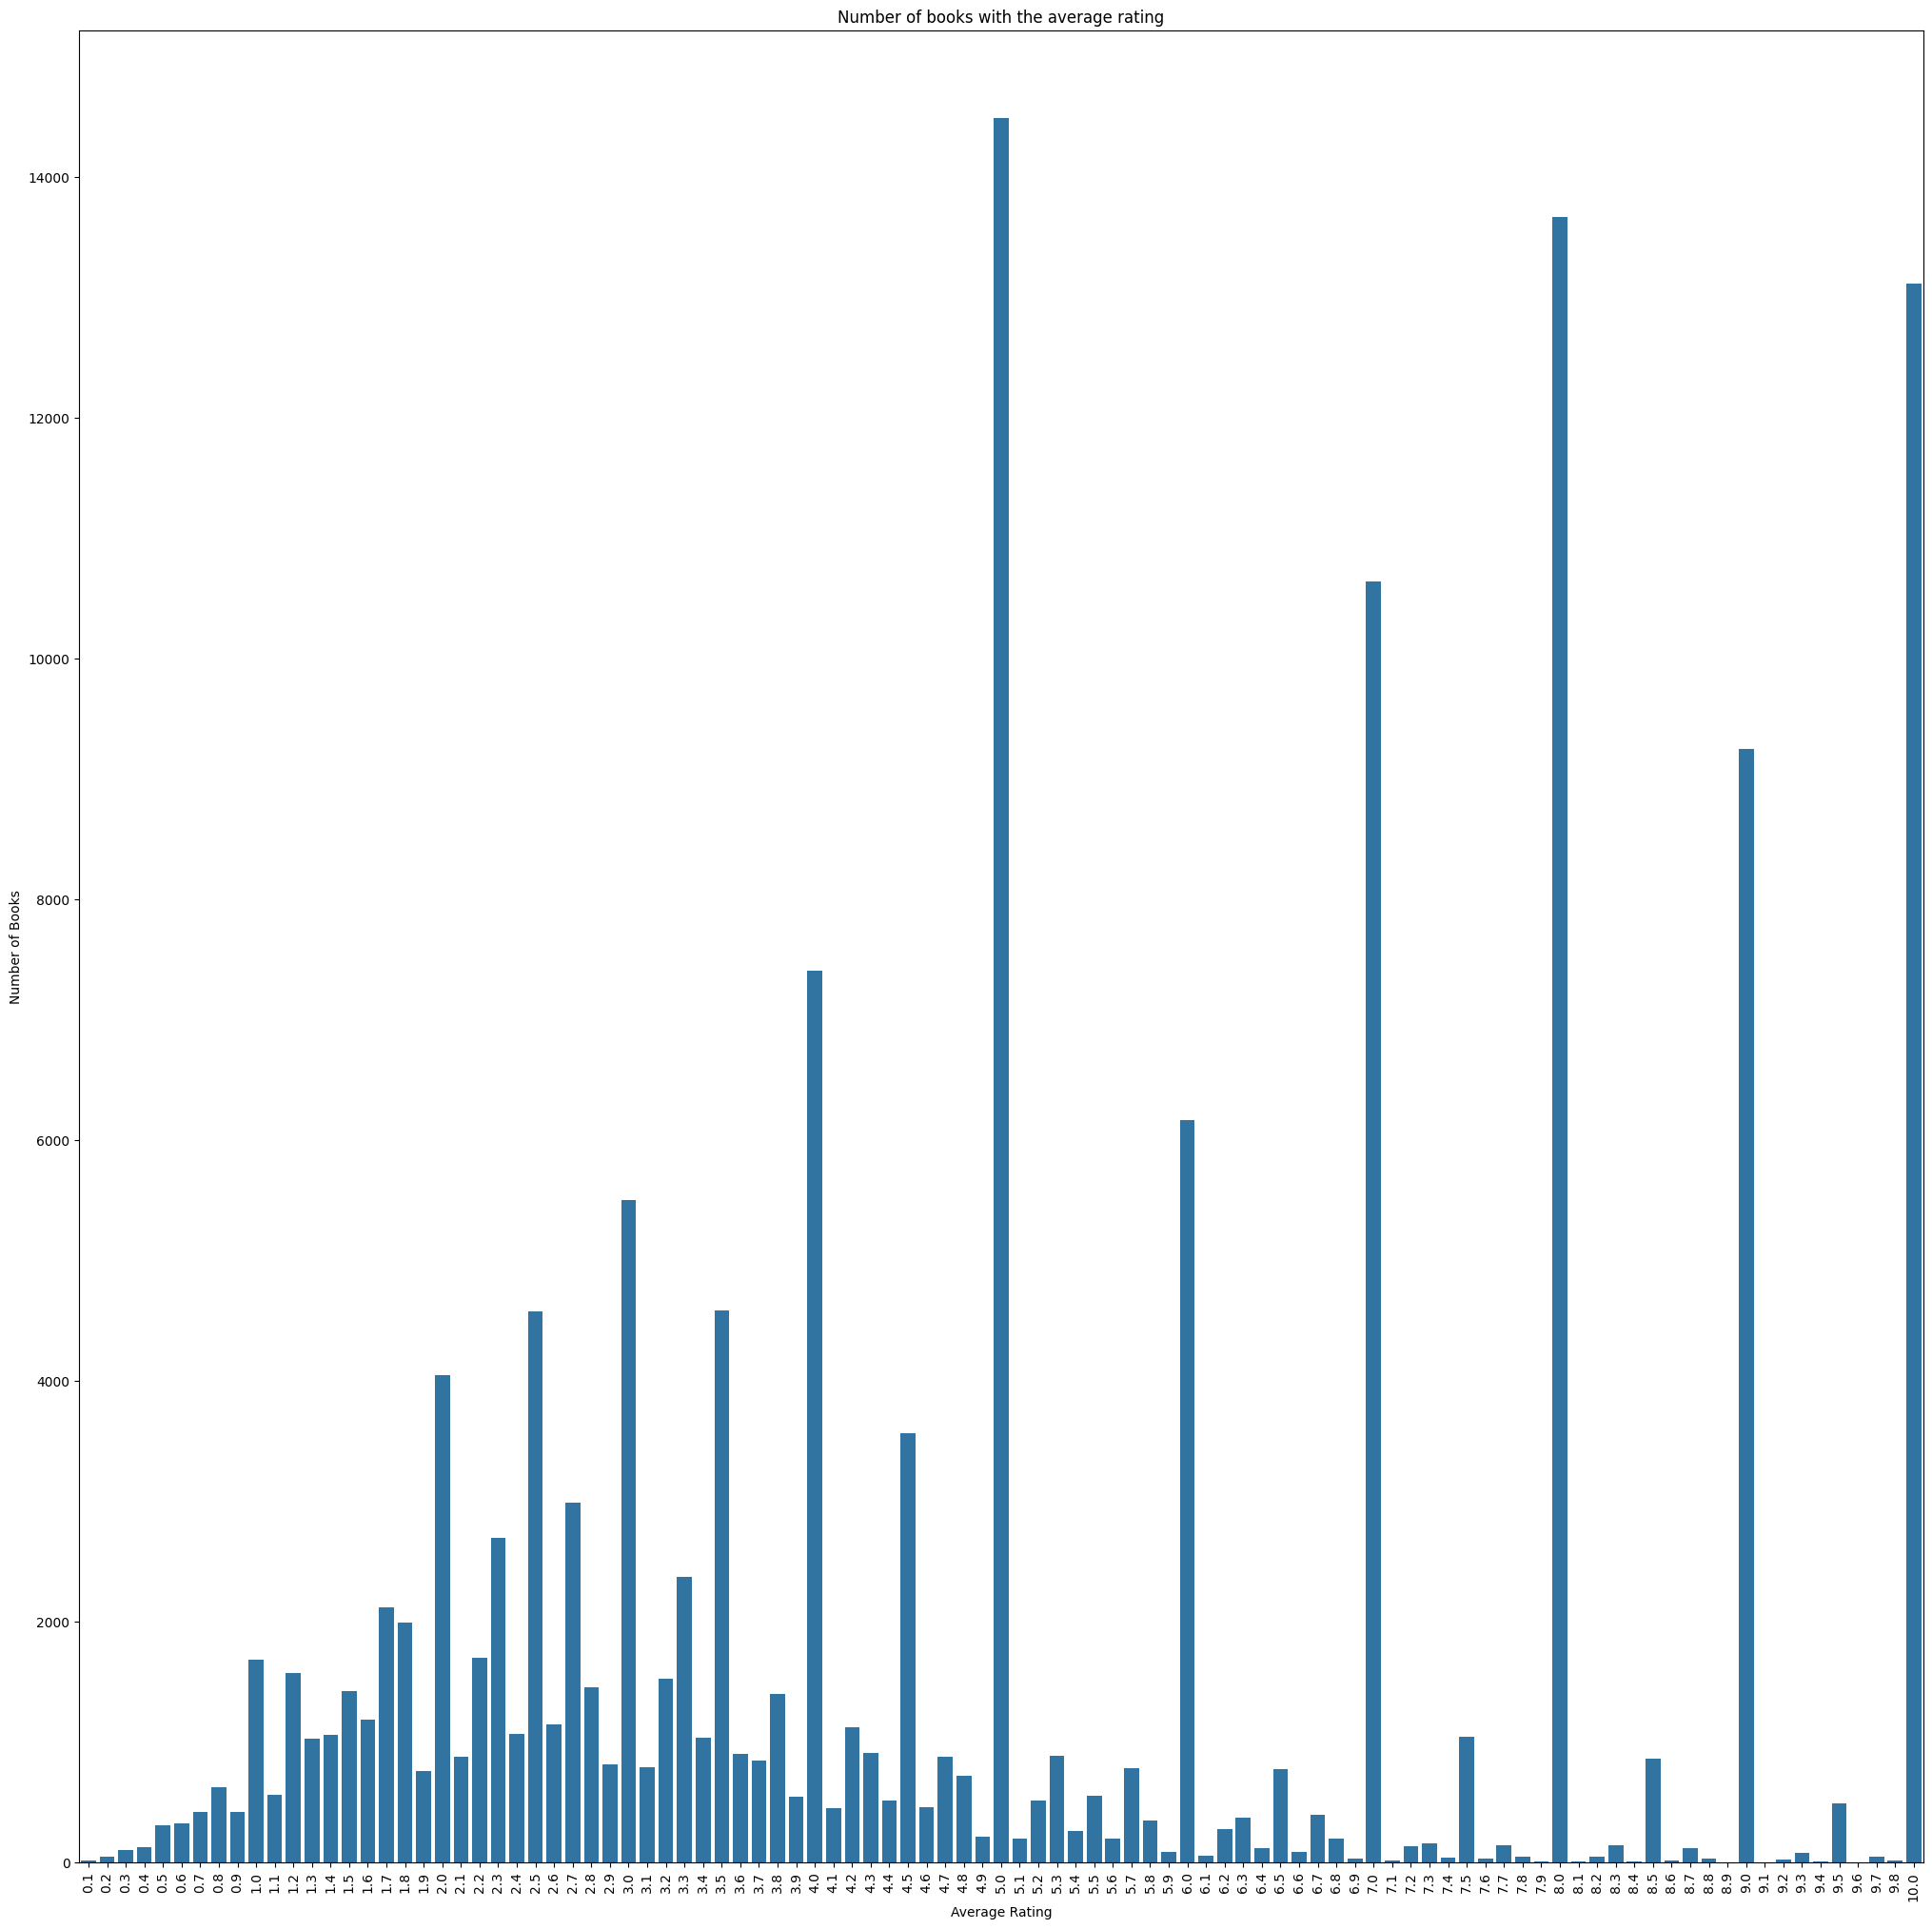

In [89]:
plt.figure(figsize=(25,25))
ratings_sorted_0_excluded = ratings_sorted.drop(index=0.0).sort_index(ascending=False)
sns_plot = sns.barplot(x=ratings_sorted_0_excluded.index, y=ratings_sorted_0_excluded.values)
plt.xticks(rotation='vertical')
plt.xlabel("Average Rating")
plt.ylabel('Number of Books')
plt.title("Number of books with the average rating")
plt.show()

In [90]:
top_20_ratings = books_with_rating['Average-Rating'].value_counts().drop(index=0.0).sort_values(ascending=False).head(20)

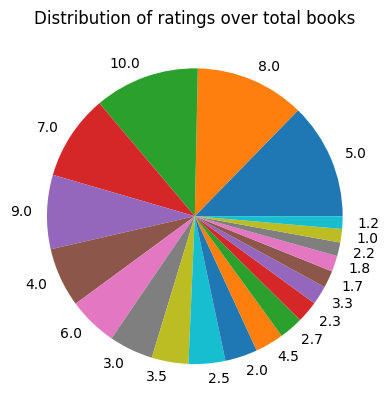

In [91]:
plt.pie(top_20_ratings, labels=top_20_ratings.index)
plt.title("Distribution of ratings over total books")
plt.show()

# Data Visualization results

5, 8, 10 are the most rating

In [92]:
display(users.shape)
users.head()

(278858, 2)

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [93]:
len(users.Location.unique())

57339

so we have users from *57339* difference locations

In [94]:
users.Location.value_counts()

Location
london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: count, Length: 57339, dtype: int64

## MACHINE LEARNING AND BUILDING A MODEL

## Popularity Based Recommender System

We would select the top 50 books that have the highest average ratings and then display them over to the user.
But the problem with this system is that if some book has low number of votes but high rating then it could get biased and proportionally incorrect.
So, inorder to avoid that we will set a criteria where we only select the average ratings of books that have been voted by at least 100 users.

In [96]:
ratings_books_merged = ratings.merge(books, on='ISBN')
display(ratings_books_merged.head())
ratings_books_merged.shape

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


(1031136, 10)

## Number of Votes

cout number of vote.

In [97]:
ratings_books_nonzero = ratings_books_merged[ratings_books_merged['Book-Rating']!=0]
num_rating_df = ratings_books_nonzero.groupby('Book-Title').count()['Book-Rating'].sort_values(ascending=False).reset_index()
num_rating_df.rename(columns={'Book-Rating':'Number-of-Ratings'}, inplace=True)
display(num_rating_df)

,Book-Title,Number-of-Ratings
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1
135563,Journeys to Door County,1
135564,Journeys of Simplicity: Traveling Light With T...,1
135565,Journeys into Past Lives,1


# Average Book Rating

In [98]:
avg_rating_df = ratings_books_nonzero.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
avg_rating_df.head()

,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


In [99]:
# merge dataframe
popularity_df = pd.merge(num_rating_df, avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,Number-of-Ratings,Average-Rating
0,The Lovely Bones: A Novel,707,8.185290
1,Wild Animus,581,4.390706
2,The Da Vinci Code,494,8.439271
3,The Secret Life of Bees,406,8.477833
4,The Nanny Diaries: A Novel,393,7.437659
...,...,...,...
135562,Journeys with Elijah: Eight Tales of the Prophet,1,10.000000
135563,Journeys to Door County,1,8.000000
135564,Journeys of Simplicity: Traveling Light With T...,1,6.000000
135565,Journeys into Past Lives,1,8.000000


In [100]:
# Number of Ratings >= 100
popularity_df_above_100 = popularity_df[popularity_df['Number-of-Ratings']>=100]

# Number of Ratings >= 50
popularity_df_above_50 = popularity_df[popularity_df['Number-of-Ratings'] >= 50]

# Number of Ratings >= 250
popularity_df_above_250 = popularity_df[popularity_df['Number-of-Ratings'] >= 250]

popularity_df_above_100.sort_values(by='Average-Rating', ascending=False).head(10)

,Book-Title,Number-of-Ratings,Average-Rating
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
180,"The Return of the King (The Lord of the Rings,...",103,9.213592
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
20,To Kill a Mockingbird,267,8.977528
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508
87,Ender's Game (Ender Wiggins Saga (Paperback)),151,8.920530
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927


# New metric for rating calculation

We are still facing with a problem if there are low number of high ratings, and high number of lower ratings, we get a bias and unfairness in the rating scenario.
To tackle this, lets use a new metric known as weighted metric which can be calculated by:

weighted_rating = (average_rating * number_of_ratings + minimum_threshold * default_rating)/(number_of_ratings + minimum_threshold)

where,

average_rating is available from dataframe
number_of_ratings is available from dataframe
minimum_threshold is the minimum number of votes taken for validation. Here, 100
default_rating is the neutral state. Here, 5.0

In [103]:
def calculationWeightedRating(row, avgRating, numOfRatings, minThres, defRating):
    weightedRating = ((row[avgRating] * row[numOfRatings]) + (minThres * defRating))/(row[numOfRatings] + minThres)
    return weightedRating

In [105]:
popularity_df_above_100 = popularity_df_above_100.copy()
popularity_df_above_100['Weighted-Rating'] = popularity_df_above_100.apply(lambda x: calculationWeightedRating(
     x, 'Average-Rating', 'Number-of-Ratings', 100, 5),axis=1)
popularity_df_above_100.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599
20,To Kill a Mockingbird,267,8.977528,7.893733
2,The Da Vinci Code,494,8.439271,7.860269
0,The Lovely Bones: A Novel,707,8.185290,7.790582
3,The Secret Life of Bees,406,8.477833,7.790514
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836


In [107]:
# For number of ratings above 50
popularity_df_above_50 = popularity_df_above_50.copy()
popularity_df_above_50['Weighted-Rating'] = popularity_df_above_50.apply(lambda x: calculationWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 50, 5), axis=1)
popularity_df_above_50.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
27,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,8.430976
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,8.425076
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.397260
20,To Kill a Mockingbird,267,8.977528,8.350158
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,8.329787
42,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,8.272031
113,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,8.166667
68,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,8.163717
2,The Da Vinci Code,494,8.439271,8.123162
47,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,8.121569


In [109]:
# For number of ratings above 250
popularity_df_above_250 = popularity_df_above_250.copy()
popularity_df_above_250['Weighted-Rating'] = popularity_df_above_250.apply(lambda x: calculationWeightedRating(
    x, 'Average-Rating', 'Number-of-Ratings', 250, 5), axis=1)
popularity_df_above_250.sort_values(
    'Weighted-Rating', ascending=False).head(20)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating
0,The Lovely Bones: A Novel,707,8.185290,7.353187
2,The Da Vinci Code,494,8.439271,7.283602
11,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.194690
9,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.173611
3,The Secret Life of Bees,406,8.477833,7.152439
17,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.125237
20,To Kill a Mockingbird,267,8.977528,7.054159
5,The Red Tent (Bestselling Backlist),383,8.182768,6.925750
26,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000,6.794000
8,Life of Pi,336,8.080357,6.766212


merging to get full info

In [110]:
popular_df_merge = pd.merge(popularity_df_above_100, books, on='Book-Title').drop_duplicates('Book-Title',keep='first')
popular_df_merge = popular_df_merge.drop(columns=['Image-URL-S', 'Image-URL-L'])
display(popular_df_merge.shape)
popular_df_merge.sort_values('Weighted-Rating', ascending=False).head(10)

(200, 9)

,Book-Title,Number-of-Ratings,Average-Rating,Weighted-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
38,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,7.987952,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
56,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,7.970822,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
32,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,7.938967,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...
107,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,7.936599,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
67,To Kill a Mockingbird,267,8.977528,7.893733,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...
2,The Da Vinci Code,494,8.439271,7.860269,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
0,The Lovely Bones: A Novel,707,8.185290,7.790582,0316666343,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
8,The Secret Life of Bees,406,8.477833,7.790514,0142001740,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
167,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,7.745981,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
185,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,7.609836,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...


# TOP RATED BOOKS
The books shown above are the top rated books and could be shown in the home page of the app